# Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from library.sb_utils import save_file

# Load The Data: 

In [2]:
# Read the cleaned csv file
car_data = pd.read_csv('../data/car_data_cleaned.csv')
#Call the info method on car_data to see a summary of the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11199 entries, 0 to 11198
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11199 non-null  object 
 4   Engine HP          11155 non-null  float64
 5   Engine Cylinders   11199 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11199 non-null  float64
 9   Vehicle Size       11199 non-null  object 
 10  Vehicle Style      11199 non-null  object 
 11  highway MPG        11199 non-null  int64  
 12  city mpg           11199 non-null  int64  
 13  Popularity         11199 non-null  int64  
 14  MSRP               11199 non-null  int64  
 15  Crossover          11199 non-null  int64  
 16  Diesel             111

In [3]:
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,1,0,0,1,0,1,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,1
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,1,0,1,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,1
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,0


# Explore The Data:

In [4]:
#Filter the dataframe to display just the rows for BMW 
BMW_car = car_data[car_data.Make == 'BMW']
BMW_car.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.0,324.000000,324.000000,324.000000,324.000000,324.000000,324.0,324.000000,324.000000,324.000000,324.0,324.000000
mean,2014.333333,329.620370,6.012346,3.166667,29.126543,20.700617,3916.0,62162.558642,0.166667,0.061728,0.012346,0.197531,0.0,0.070988,0.351852,0.027778,1.0,0.361111
std,4.453405,106.148391,1.723944,0.987538,10.386615,13.335160,0.0,28173.676523,0.373254,0.241034,0.110594,0.398752,0.0,0.257201,0.478287,0.164590,0.0,0.481066
min,1995.000000,170.000000,0.000000,2.000000,18.000000,10.000000,3916.0,4697.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000
25%,2015.000000,240.000000,4.000000,2.000000,24.750000,17.000000,3916.0,42437.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000
50%,2016.000000,302.000000,6.000000,4.000000,28.000000,19.000000,3916.0,52450.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000
75%,2016.000000,425.000000,8.000000,4.000000,32.000000,22.000000,3916.0,80700.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.0,1.000000
max,2017.000000,600.000000,12.000000,4.000000,111.000000,137.000000,3916.0,141200.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.0,1.000000


Text(0.5, 1.0, 'Distribution of MSRP - BMW')

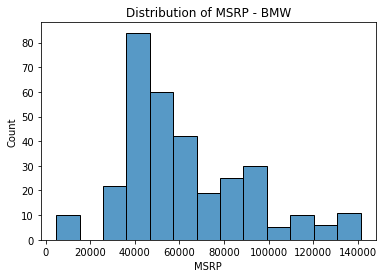

In [5]:
sns.histplot(BMW_car['MSRP'])
plt.title('Distribution of MSRP - BMW')

In [6]:
BMW_car['Popularity'].value_counts()

3916    324
Name: Popularity, dtype: int64

The BMW brand has a huge range of MSRP. From minimum 4697 to maximum 141200. The majority falls in between 40000-80000. The popularity seems to be associated with brand only. Let's example this idea.

In [7]:
#Let's take a look at the average car price for each brand
car_data.groupby('Make')['Popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Acura,246.0,204.0,0.0,204.0,204.0,204.0,204.0,204.0
Alfa Romeo,5.0,113.0,0.0,113.0,113.0,113.0,113.0,113.0
Aston Martin,91.0,259.0,0.0,259.0,259.0,259.0,259.0,259.0
Audi,321.0,3105.0,0.0,3105.0,3105.0,3105.0,3105.0,3105.0
BMW,324.0,3916.0,0.0,3916.0,3916.0,3916.0,3916.0,3916.0
Bentley,74.0,520.0,0.0,520.0,520.0,520.0,520.0,520.0
Bugatti,3.0,820.0,0.0,820.0,820.0,820.0,820.0,820.0
Buick,190.0,155.0,0.0,155.0,155.0,155.0,155.0,155.0
Cadillac,396.0,1624.0,0.0,1624.0,1624.0,1624.0,1624.0,1624.0


So it is true that popualarity is just the measurement for the brand. There is no variation when looking at different models of a brand.

In [8]:
#Let's take a look at the car price for each brand
car_data.groupby('Make')['MSRP'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Acura,246.0,3.508749e+04,19240.851577,2000.0,25100.00,36262.5,45478.75,156000.0
Alfa Romeo,5.0,6.160000e+04,6360.031446,53900.0,55900.00,63900.0,65900.00,68400.0
Aston Martin,91.0,1.981235e+05,64437.230331,98200.0,138445.00,197850.0,267330.00,320695.0
Audi,321.0,5.457412e+04,38266.122150,2000.0,38350.00,47000.0,60800.00,199900.0
BMW,324.0,6.216256e+04,28173.676523,4697.0,42437.50,52450.0,80700.00,141200.0
Bentley,74.0,2.471693e+05,49163.026266,177500.0,209600.00,231600.0,280275.00,363000.0
Bugatti,3.0,1.757224e+06,286438.397290,1500000.0,1602884.50,1705769.0,1885835.50,2065902.0
Buick,190.0,2.903419e+04,11977.349084,2000.0,26205.00,31027.5,35845.00,49625.0
Cadillac,396.0,5.636827e+04,19211.899878,2000.0,45367.50,51650.0,69665.00,104215.0


In [9]:
#Let's take a look at the average car price for each brand
brand_vs_price = car_data.groupby('Make')['MSRP'].mean().sort_values(ascending=False)
brand_vs_price

Make
Bugatti          1.757224e+06
Maybach          5.462219e+05
Rolls-Royce      3.511306e+05
Lamborghini      3.315673e+05
Bentley          2.471693e+05
McLaren          2.398050e+05
Ferrari          2.382188e+05
Spyker           2.149900e+05
Aston Martin     1.981235e+05
Maserati         1.136845e+05
Porsche          1.016224e+05
Tesla            8.525556e+04
Mercedes-Benz    7.206953e+04
Lotus            6.837714e+04
Land Rover       6.806709e+04
BMW              6.216256e+04
Alfa Romeo       6.160000e+04
Cadillac         5.636827e+04
Audi             5.457412e+04
Lexus            4.754907e+04
Genesis          4.661667e+04
Lincoln          4.386082e+04
Infiniti         4.264027e+04
HUMMER           3.646441e+04
Acura            3.508749e+04
GMC              3.244409e+04
Volvo            2.972468e+04
Chevrolet        2.907473e+04
Buick            2.903419e+04
Volkswagen       2.897852e+04
Nissan           2.892115e+04
Toyota           2.884656e+04
Ford             2.851131e+04
Saab 

[Text(0, 0, 'Bugatti'),
 Text(1, 0, 'Maybach'),
 Text(2, 0, 'Rolls-Royce'),
 Text(3, 0, 'Lamborghini'),
 Text(4, 0, 'Bentley'),
 Text(5, 0, 'McLaren'),
 Text(6, 0, 'Ferrari'),
 Text(7, 0, 'Spyker'),
 Text(8, 0, 'Aston Martin'),
 Text(9, 0, 'Maserati'),
 Text(10, 0, 'Porsche'),
 Text(11, 0, 'Tesla'),
 Text(12, 0, 'Mercedes-Benz'),
 Text(13, 0, 'Lotus'),
 Text(14, 0, 'Land Rover'),
 Text(15, 0, 'BMW'),
 Text(16, 0, 'Alfa Romeo'),
 Text(17, 0, 'Cadillac'),
 Text(18, 0, 'Audi'),
 Text(19, 0, 'Lexus'),
 Text(20, 0, 'Genesis'),
 Text(21, 0, 'Lincoln'),
 Text(22, 0, 'Infiniti'),
 Text(23, 0, 'HUMMER'),
 Text(24, 0, 'Acura'),
 Text(25, 0, 'GMC'),
 Text(26, 0, 'Volvo'),
 Text(27, 0, 'Chevrolet'),
 Text(28, 0, 'Buick'),
 Text(29, 0, 'Volkswagen'),
 Text(30, 0, 'Nissan'),
 Text(31, 0, 'Toyota'),
 Text(32, 0, 'Ford'),
 Text(33, 0, 'Saab'),
 Text(34, 0, 'Chrysler'),
 Text(35, 0, 'Honda'),
 Text(36, 0, 'Kia'),
 Text(37, 0, 'Hyundai'),
 Text(38, 0, 'Dodge'),
 Text(39, 0, 'Subaru'),
 Text(40, 0, 'FIAT

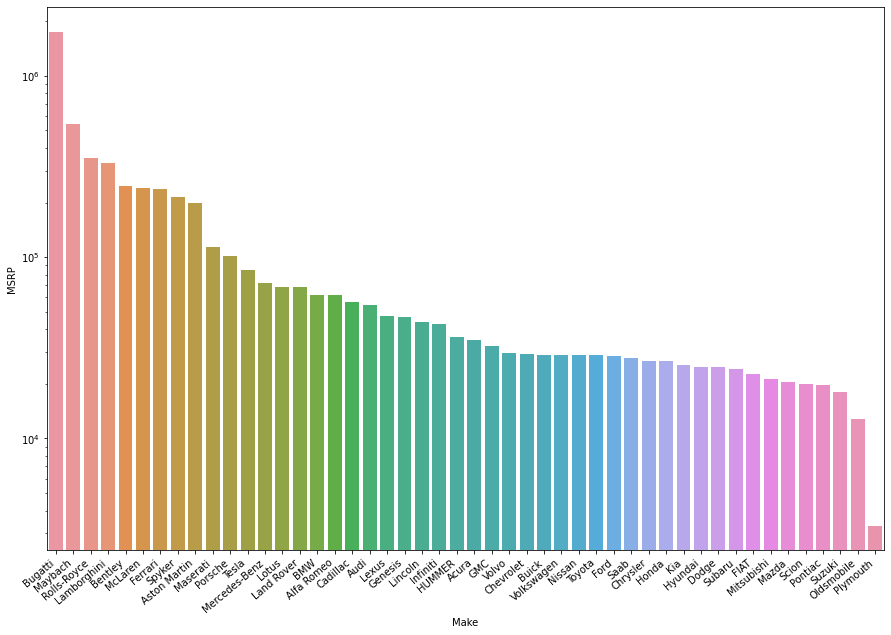

In [10]:
plt.figure(figsize = (15,10))
chart = sns.barplot(x=brand_vs_price.index,y=brand_vs_price)
chart.set_yscale("log")
chart.set_xticklabels(chart.get_xticklabels(), rotation=40,horizontalalignment='right')

BMW ranked the 16th place. There is some relationship about the brand and the car price by looking at the distribution. The brand with extremely high price are all high-perfomance luxury car brands.

In [11]:
#Let's take a look at the average car price for each brand
brand_vs_popularity = car_data.groupby('Make')['Popularity'].mean().sort_values(ascending=False)
brand_vs_popularity

Make
Ford             5657
BMW              3916
Audi             3105
Ferrari          2774
Honda            2202
Toyota           2031
Nissan           2009
Dodge            1851
Kia              1720
Porsche          1715
Cadillac         1624
Hyundai          1439
Tesla            1391
Chevrolet        1385
Lamborghini      1158
Chrysler         1013
Volkswagen        873
Volvo             870
Bugatti           820
FIAT              819
Subaru            640
Mercedes-Benz     617
Lotus             613
Mazda             586
GMC               549
Plymouth          535
Bentley           520
Suzuki            481
Lexus             454
Mitsubishi        436
McLaren           416
Saab              376
Aston Martin      259
Land Rover        258
Maserati          238
Pontiac           210
Acura             204
Infiniti          190
Buick             155
HUMMER            130
Alfa Romeo        113
Scion             105
Rolls-Royce        86
Maybach            67
Lincoln            61
Oldsm

[Text(0, 0, 'Ford'),
 Text(1, 0, 'BMW'),
 Text(2, 0, 'Audi'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'Honda'),
 Text(5, 0, 'Toyota'),
 Text(6, 0, 'Nissan'),
 Text(7, 0, 'Dodge'),
 Text(8, 0, 'Kia'),
 Text(9, 0, 'Porsche'),
 Text(10, 0, 'Cadillac'),
 Text(11, 0, 'Hyundai'),
 Text(12, 0, 'Tesla'),
 Text(13, 0, 'Chevrolet'),
 Text(14, 0, 'Lamborghini'),
 Text(15, 0, 'Chrysler'),
 Text(16, 0, 'Volkswagen'),
 Text(17, 0, 'Volvo'),
 Text(18, 0, 'Bugatti'),
 Text(19, 0, 'FIAT'),
 Text(20, 0, 'Subaru'),
 Text(21, 0, 'Mercedes-Benz'),
 Text(22, 0, 'Lotus'),
 Text(23, 0, 'Mazda'),
 Text(24, 0, 'GMC'),
 Text(25, 0, 'Plymouth'),
 Text(26, 0, 'Bentley'),
 Text(27, 0, 'Suzuki'),
 Text(28, 0, 'Lexus'),
 Text(29, 0, 'Mitsubishi'),
 Text(30, 0, 'McLaren'),
 Text(31, 0, 'Saab'),
 Text(32, 0, 'Aston Martin'),
 Text(33, 0, 'Land Rover'),
 Text(34, 0, 'Maserati'),
 Text(35, 0, 'Pontiac'),
 Text(36, 0, 'Acura'),
 Text(37, 0, 'Infiniti'),
 Text(38, 0, 'Buick'),
 Text(39, 0, 'HUMMER'),
 Text(40, 0, 'Alfa Romeo')

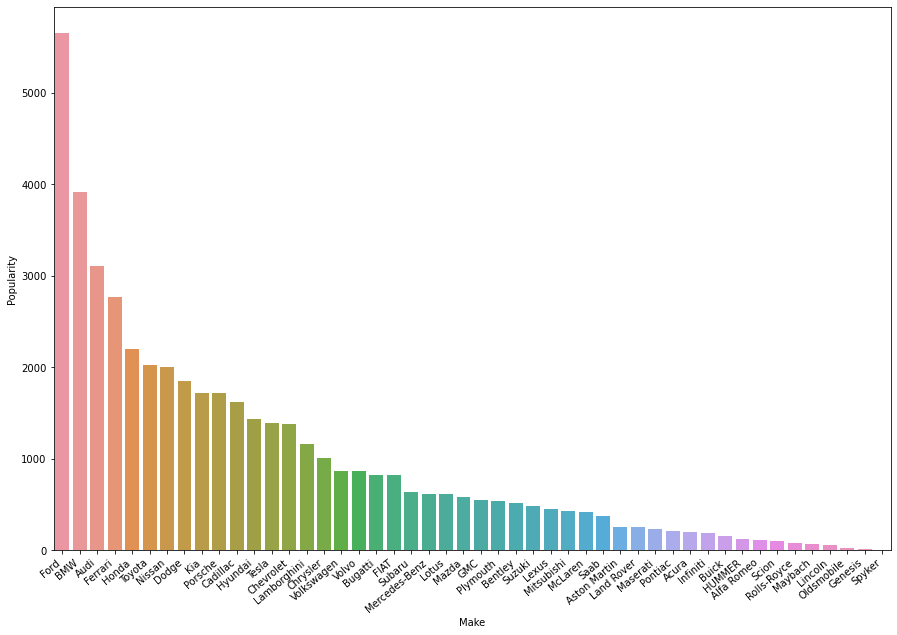

In [12]:
plt.figure(figsize = (15,10))
chart = sns.barplot(x=brand_vs_popularity.index,y=brand_vs_popularity)
chart.set_xticklabels(chart.get_xticklabels(), rotation=40, horizontalalignment='right')

BMW ranked the second place when we compare popularity among brands. It looks like the those high-performance luxury car brands are not as popular as other brands.

In [13]:
combined_price_pop = pd.concat([brand_vs_price,brand_vs_popularity], axis=1)
combined_price_pop

,MSRP,Popularity
Bugatti,1.757224e+06,820
Maybach,5.462219e+05,67
Rolls-Royce,3.511306e+05,86
Lamborghini,3.315673e+05,1158
Bentley,2.471693e+05,520
McLaren,2.398050e+05,416
Ferrari,2.382188e+05,2774
Spyker,2.149900e+05,2
Aston Martin,1.981235e+05,259
Maserati,1.136845e+05,238


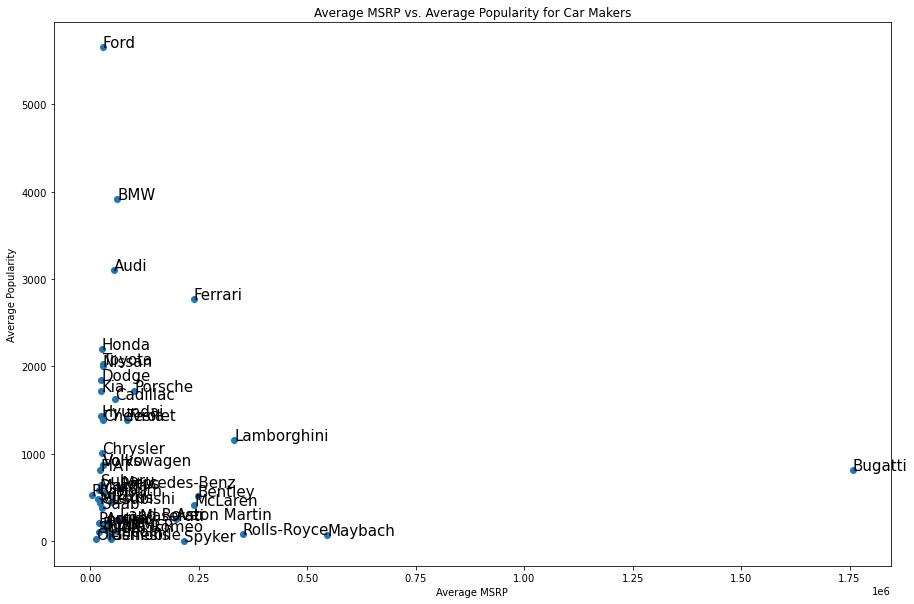

In [14]:
plt.figure(figsize = (15,10))
plt.scatter(combined_price_pop['MSRP'], combined_price_pop['Popularity'])
plt.xlabel('Average MSRP')
plt.ylabel('Average Popularity')
plt.title('Average MSRP vs. Average Popularity for Car Makers')
for s, x, y in zip(list(combined_price_pop.index), combined_price_pop['MSRP'], combined_price_pop['Popularity']):
    plt.annotate(s, (x, y),fontsize=15)

As shown above, the higher the average MSRP, the average popularity tends to get smaller. If we look at the average popularity above 2000, the range of MSRP is 26000 to 240000 dollars.

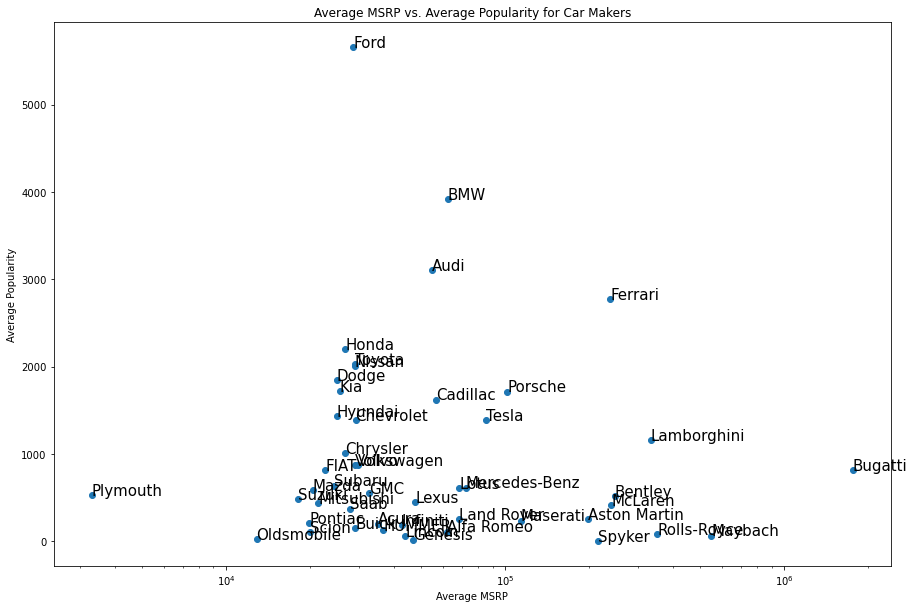

In [15]:
#It might be better to take a log for the average MSRP, since the data is highly skewed.
plt.figure(figsize = (15,10))
plt.scatter(combined_price_pop['MSRP'], combined_price_pop['Popularity'])
plt.xscale('log')
plt.xlabel('Average MSRP')
plt.ylabel('Average Popularity')
plt.title('Average MSRP vs. Average Popularity for Car Makers')
for s, x, y in zip(list(combined_price_pop.index), combined_price_pop['MSRP'], combined_price_pop['Popularity']):
    plt.annotate(s, (x, y),fontsize=15)

In [16]:
#Let's look at the other object feature: Engine Fuel Type
#See if it is related to the MSRP
enginefuel_vs_price = car_data.groupby('Engine Fuel Type')['MSRP'].mean().sort_values(ascending=False)
enginefuel_vs_price

Engine Fuel Type
flex-fuel (premium unleaded required/E85)       160692.264151
premium unleaded (required)                     102814.088957
flex-fuel (premium unleaded recommended/E85)     48641.923077
electric                                         47943.030303
premium unleaded (recommended)                   41812.512213
diesel                                           40449.680000
flex-fuel (unleaded/natural gas)                 39194.166667
flex-fuel (unleaded/E85)                         36279.217587
natural gas                                      28065.000000
regular unleaded                                 23830.813692
Name: MSRP, dtype: float64

[Text(0, 0, 'flex-fuel\n(premium\nunleaded\nrequired/E85)'),
 Text(1, 0, 'premium\nunleaded\n(required)'),
 Text(2, 0, 'flex-fuel\n(premium\nunleaded recomm\nended/E85)'),
 Text(3, 0, 'electric'),
 Text(4, 0, 'premium\nunleaded\n(recommended)'),
 Text(5, 0, 'diesel'),
 Text(6, 0, 'flex-fuel (unle\naded/natural\ngas)'),
 Text(7, 0, 'flex-fuel\n(unleaded/E85)'),
 Text(8, 0, 'natural gas'),
 Text(9, 0, 'regular\nunleaded')]

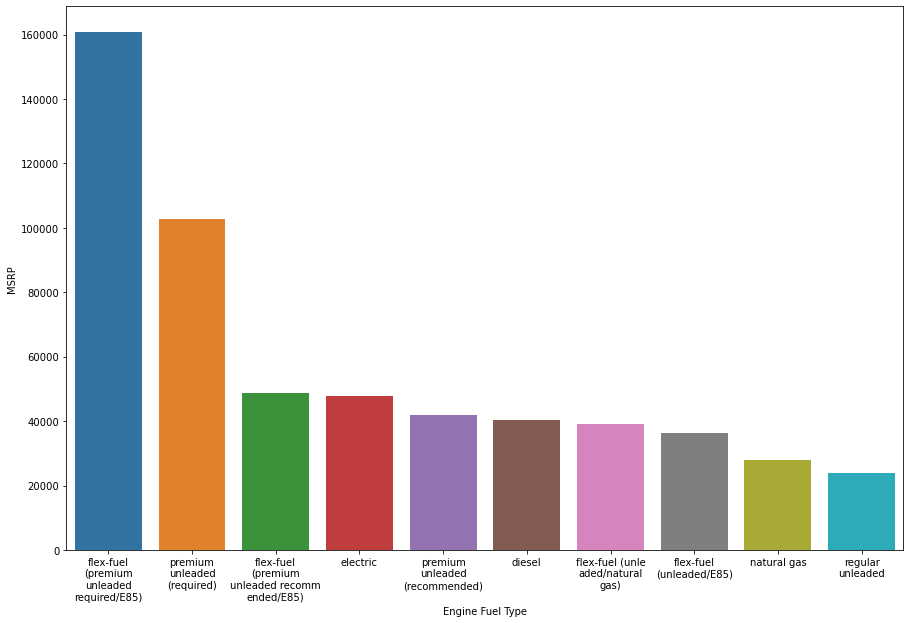

In [17]:
import textwrap
plt.figure(figsize = (15,10))
chart = sns.barplot(x=enginefuel_vs_price.index,y=enginefuel_vs_price)
chart.set_xticklabels(textwrap.fill(x.get_text(), 15) for x in chart.get_xticklabels())

In [18]:
car_data['Engine Fuel Type'].value_counts()

regular unleaded                                6661
premium unleaded (required)                     1956
premium unleaded (recommended)                  1392
flex-fuel (unleaded/E85)                         887
diesel                                           150
electric                                          66
flex-fuel (premium unleaded required/E85)         53
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

It looks like the cars that required higher quality of Engine Fuel tends to charge higher price. The Electric cars also have very high average price. 

In [19]:
enginefuel_vs_popularity = car_data.groupby('Engine Fuel Type')['Popularity'].mean().sort_values(ascending=False)
enginefuel_vs_popularity

Engine Fuel Type
flex-fuel (unleaded/E85)                        2278.855693
natural gas                                     2202.000000
electric                                        1773.454545
diesel                                          1649.240000
regular unleaded                                1569.848071
premium unleaded (required)                     1449.656442
flex-fuel (unleaded/natural gas)                1385.000000
flex-fuel (premium unleaded recommended/E85)    1332.807692
premium unleaded (recommended)                  1227.055316
flex-fuel (premium unleaded required/E85)        376.641509
Name: Popularity, dtype: float64

Although cars required higher quality fuel can sell for higher price, the popularity is not as high the cars only require regular fuel.

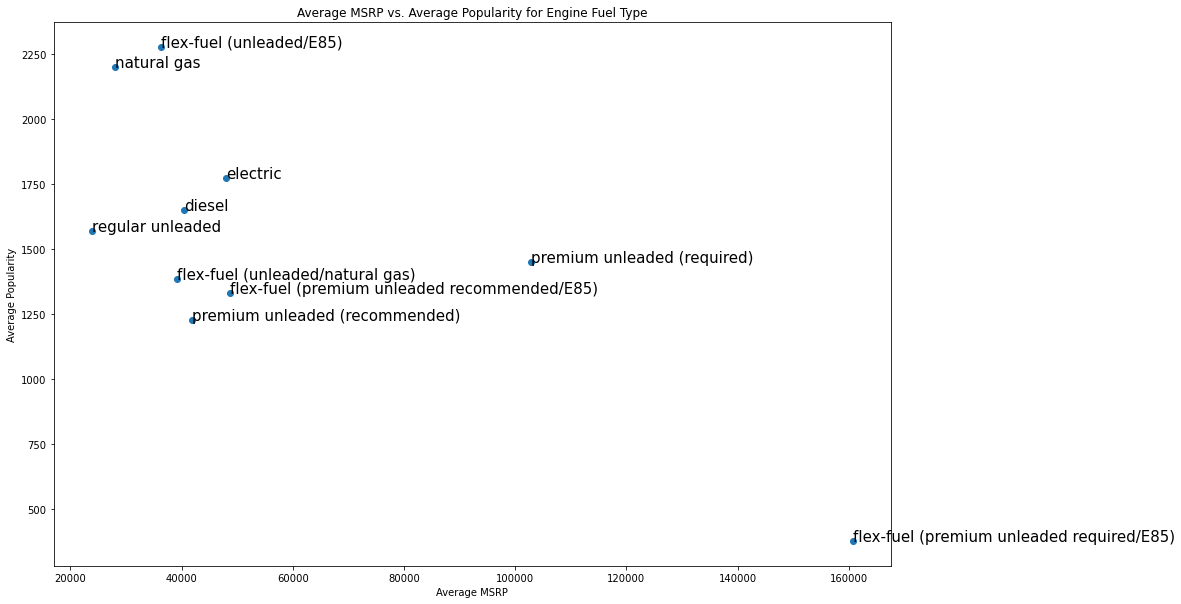

In [20]:
combined_price_pop = pd.concat([enginefuel_vs_price,enginefuel_vs_popularity], axis=1)
plt.figure(figsize = (15,10))
plt.scatter(combined_price_pop['MSRP'], combined_price_pop['Popularity'])
plt.xlabel('Average MSRP')
plt.ylabel('Average Popularity')
plt.title('Average MSRP vs. Average Popularity for Engine Fuel Type')
for s, x, y in zip(list(combined_price_pop.index), combined_price_pop['MSRP'], combined_price_pop['Popularity']):
    plt.annotate(s, (x, y),fontsize=15)

In [21]:
#Let's look at the next object feature: Transmission Type
#See if it is related to the MSRP
transtype_vs_price = car_data.groupby('Transmission Type')['MSRP'].mean().sort_values(ascending=False)
transtype_vs_price

Transmission Type
AUTOMATED_MANUAL    108718.987342
DIRECT_DRIVE         47351.250000
AUTOMATIC            41816.124307
MANUAL               28267.919894
UNKNOWN               3647.833333
Name: MSRP, dtype: float64

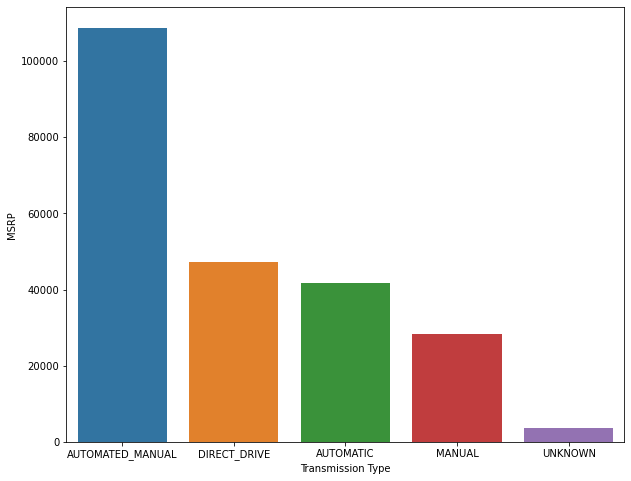

In [22]:
plt.figure(figsize = (10,8))
chart = sns.barplot(x=transtype_vs_price.index,y=transtype_vs_price)

In [23]:
transtype_vs_popularity = car_data.groupby('Transmission Type')['Popularity'].mean().sort_values(ascending=False)
transtype_vs_popularity

Transmission Type
DIRECT_DRIVE        1762.029412
AUTOMATED_MANUAL    1755.036166
MANUAL              1615.311314
AUTOMATIC           1525.670323
UNKNOWN              562.916667
Name: Popularity, dtype: float64

It doesn't mean a whole lot by looking at the mean of MSRP and popularity of each transmission type. The average of "Automated_Manual" is particularly high. It might because luxury high-performance car tends to be this particular transmission type. Looking at the aveage of popularity, the variation among differenct transmission types is relatively small. It might tells that customers do not care much about what kind of transmission type the car has.

In [24]:
#Let's look at the next object feature: Driven_Wheels
#See if it is related to the MSRP
wheels_vs_price = car_data.groupby('Driven_Wheels')['MSRP'].mean().sort_values(ascending=False)
wheels_vs_price

Driven_Wheels
all wheel drive      59006.256066
rear wheel drive     57026.669365
four wheel drive     36660.401509
front wheel drive    23334.250115
Name: MSRP, dtype: float64

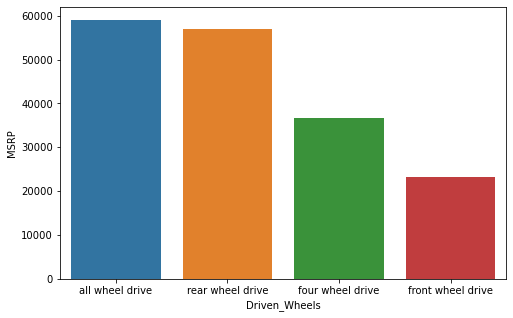

In [25]:
plt.figure(figsize = (8,5))
chart = sns.barplot(x=wheels_vs_price.index,y=wheels_vs_price)

In [26]:
wheels_vs_popularity = car_data.groupby('Driven_Wheels')['Popularity'].mean().sort_values(ascending=False)
wheels_vs_popularity

Driven_Wheels
four wheel drive     1751.868679
rear wheel drive     1721.665940
all wheel drive      1527.519931
front wheel drive    1395.664217
Name: Popularity, dtype: float64

Similar to the Transmission type feature, the popularity among differenct types of "Driven Wheeels" does not vary a lot. Cars with all wheel drive or rear wheel drive tend to sell for higher price.

In [27]:
#Let's look at the next object feature: Vehicle Size
#See if it is related to the MSRP
size_vs_price = car_data.groupby('Vehicle Size')['MSRP'].mean().sort_values(ascending=False)
size_vs_price

Vehicle Size
Large      55352.122624
Midsize    40031.293133
Compact    35506.201138
Name: MSRP, dtype: float64

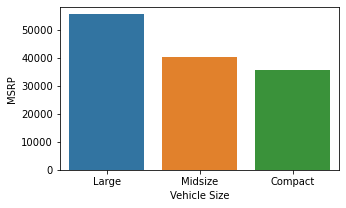

In [28]:
plt.figure(figsize = (5,3))
chart = sns.barplot(x=size_vs_price.index,y=size_vs_price)

In [29]:
size_vs_popularity = car_data.groupby('Vehicle Size')['Popularity'].mean().sort_values(ascending=False)
size_vs_popularity

Vehicle Size
Large      1879.022363
Compact    1460.921047
Midsize    1453.843727
Name: Popularity, dtype: float64

It is very pratical that bigger cars can sell for higher price. And people also love larger car. However compact and midsize do not have much difference in popularity.

In [30]:
#Let's look at the next object feature: Vehicle Style 
#See if it is related to the MSRP
style_vs_price = car_data.groupby('Vehicle Style')['MSRP'].mean().sort_values(ascending=False)
style_vs_price

Vehicle Style
Convertible            88216.792173
Coupe                  77595.287660
4dr SUV                40730.273624
Sedan                  40462.020049
Crew Cab Pickup        37183.111450
Passenger Van          30578.066116
Passenger Minivan      26176.562982
Wagon                  26156.939502
Extended Cab Pickup    23041.772194
4dr Hatchback          22416.467572
Cargo Minivan          20315.593220
Convertible SUV        17975.000000
Regular Cab Pickup     17854.649275
Cargo Van              17019.297619
2dr Hatchback          16177.740291
2dr SUV                14306.549451
Name: MSRP, dtype: float64

Text(0.5, 1.0, 'Average MSRP for Vehicle Styles')

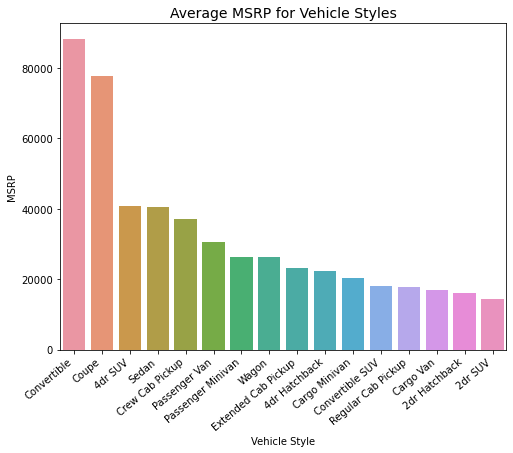

In [31]:
plt.figure(figsize = (8,6))
chart = sns.barplot(x=style_vs_price.index,y=style_vs_price)
chart.set_xticklabels(chart.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.title('Average MSRP for Vehicle Styles', fontsize=14)

In [32]:
style_vs_popularity = car_data.groupby('Vehicle Style')['Popularity'].mean().sort_values(ascending=False)
style_vs_popularity

Vehicle Style
Passenger Van          3871.793388
Cargo Minivan          2878.576271
Cargo Van              2698.928571
2dr SUV                2350.868132
Regular Cab Pickup     2202.214493
Extended Cab Pickup    2095.474037
Crew Cab Pickup        1996.856489
Passenger Minivan      1828.092545
Wagon                  1612.861210
Coupe                  1573.697872
4dr Hatchback          1516.033183
Convertible            1514.782726
Sedan                  1322.348927
4dr SUV                1314.135579
2dr Hatchback          1166.757282
Convertible SUV         814.535714
Name: Popularity, dtype: float64

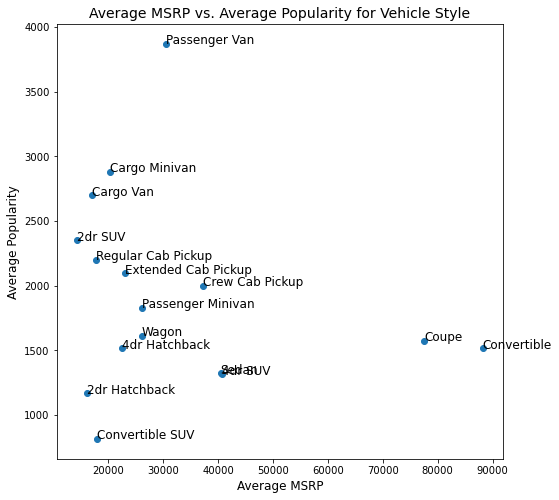

In [33]:
combined_price_pop = pd.concat([style_vs_price,style_vs_popularity], axis=1)
plt.figure(figsize = (8,8))
plt.scatter(combined_price_pop['MSRP'], combined_price_pop['Popularity'])
plt.xlabel('Average MSRP', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.title('Average MSRP vs. Average Popularity for Vehicle Style', fontsize=14)
for s, x, y in zip(list(combined_price_pop.index), combined_price_pop['MSRP'], combined_price_pop['Popularity']):
    plt.annotate(s, (x, y),fontsize=12)

Although fancy-looking styles like "Convertible" and "Coupe" can sell for higher price, it is obvious most people's choice is cars with large capacities like vans or trucks.

In [34]:
#Now let's take a look at the old feature called "Market Category" that has been seperated to boolean categorical 
#features.
crossover = car_data[car_data['Crossover']==1]
mean_crossover = crossover['MSRP'].mean()
noncrossover = car_data[car_data['Crossover']!=1]
mean_noncrossover = noncrossover['MSRP'].mean()
print("For crossover type vehicles, the mean MSRP is: "+str(mean_crossover))
print("For non-crossover type vehicles, the mean MSRP is: "+str(mean_noncrossover))

For crossover type vehicles, the mean MSRP is: 36694.86960882648
For non-crossover type vehicles, the mean MSRP is: 43059.08614883215


In [35]:
diesel = car_data[car_data['Diesel']==1]
mean_diesel = diesel['MSRP'].mean()
nondiesel = car_data[car_data['Diesel']!=1]
mean_nondiesel = nondiesel['MSRP'].mean()
print("For Diesel type vehicles, the mean MSRP is: "+str(mean_diesel))
print("For non-Diesel type vehicles, the mean MSRP is: "+str(mean_nondiesel))

For Diesel type vehicles, the mean MSRP is: 39348.59900990099
For non-Diesel type vehicles, the mean MSRP is: 41973.26916431754


In [36]:
exotic = car_data[car_data['Exotic']==1]
mean_exotic = exotic['MSRP'].mean()
nonexotic = car_data[car_data['Exotic']!=1]
mean_nonexotic = nonexotic['MSRP'].mean()
print("For Exotic type vehicles, the mean MSRP is: "+str(mean_exotic))
print("For non-Exotic type vehicles, the mean MSRP is: "+str(mean_nonexotic))

For Exotic type vehicles, the mean MSRP is: 233542.47046843177
For non-Exotic type vehicles, the mean MSRP is: 33139.62504669406


In [37]:
factuner = car_data[car_data['Factory Tuner']==1]
mean_factuner = factuner['MSRP'].mean()
nonfactuner = car_data[car_data['Factory Tuner']!=1]
mean_nonfactuner = nonfactuner['MSRP'].mean()
print("For Factory Tuner type vehicles, the mean MSRP is: "+str(mean_factuner))
print("For non-Factory Tuner type vehicles, the mean MSRP is: "+str(mean_nonfactuner))

For Factory Tuner type vehicles, the mean MSRP is: 85304.06075533661
For non-Factory Tuner type vehicles, the mean MSRP is: 39431.377242681774


In [38]:
flexfuel = car_data[car_data['Flex Fuel']==1]
mean_flexfuel = flexfuel['MSRP'].mean()
nonflexfuel = car_data[car_data['Flex Fuel']!=1]
mean_nonflexfuel = nonflexfuel['MSRP'].mean()
print("For Flex Fuel type vehicles, the mean MSRP is: "+str(mean_flexfuel))
print("For non-Flex Fuel type vehicles, the mean MSRP is: "+str(mean_nonflexfuel))

For Flex Fuel type vehicles, the mean MSRP is: 41199.86259541985
For non-Flex Fuel type vehicles, the mean MSRP is: 42011.35928143712


In [39]:
hatchback = car_data[car_data['Hatchback']==1]
mean_hatchback = hatchback['MSRP'].mean()
nonhatchback = car_data[car_data['Hatchback']!=1]
mean_nonhatchback = nonhatchback['MSRP'].mean()
print("For Hatchback type vehicles, the mean MSRP is: "+str(mean_hatchback))
print("For non-Hatchback type vehicles, the mean MSRP is: "+str(mean_nonhatchback))

For Hatchback type vehicles, the mean MSRP is: 20025.439069767443
For non-Hatchback type vehicles, the mean MSRP is: 44251.393816673255


In [40]:
highperf = car_data[car_data['High-Performance']==1]
mean_highperf = highperf['MSRP'].mean()
nonhighperf = car_data[car_data['High-Performance']!=1]
mean_nonhighperf = nonhighperf['MSRP'].mean()
print("For High-Performance type vehicles, the mean MSRP is: "+str(mean_highperf))
print("For non-High-Performance type vehicles, the mean MSRP is: "+str(mean_nonhighperf))

For High-Performance type vehicles, the mean MSRP is: 120954.13911143481
For non-High-Performance type vehicles, the mean MSRP is: 30883.210360268677


In [41]:
hybrid = car_data[car_data['Hybrid']==1]
mean_hybrid = hybrid['MSRP'].mean()
nonhybrid = car_data[car_data['Hybrid']!=1]
mean_nonhybrid = nonhybrid['MSRP'].mean()
print("For Hybrid type vehicles, the mean MSRP is: "+str(mean_hybrid))
print("For non-Hybrid type vehicles, the mean MSRP is: "+str(mean_nonhybrid))

For Hybrid type vehicles, the mean MSRP is: 39148.857566765575
For non-Hybrid type vehicles, the mean MSRP is: 42012.087368808694


In [42]:
luxury = car_data[car_data['Luxury']==1]
mean_luxury = luxury['MSRP'].mean()
nonluxury = car_data[car_data['Luxury']!=1]
mean_nonluxury = nonluxury['MSRP'].mean()
print("For Luxury type vehicles, the mean MSRP is: "+str(mean_luxury))
print("For non-Luxury type vehicles, the mean MSRP is: "+str(mean_nonluxury))

For Luxury type vehicles, the mean MSRP is: 64037.129422718805
For non-Luxury type vehicles, the mean MSRP is: 32994.96389620158


In [43]:
performance = car_data[car_data['Performance']==1]
mean_performance = performance['MSRP'].mean()
nonperformance = car_data[car_data['Performance']!=1]
mean_nonperformance = nonperformance['MSRP'].mean()
print("For Performance type vehicles, the mean MSRP is: "+str(mean_performance))
print("For non-Performance type vehicles, the mean MSRP is: "+str(mean_nonperformance))

For Performance type vehicles, the mean MSRP is: 44376.335893497184
For non-Performance type vehicles, the mean MSRP is: 41408.3359290504


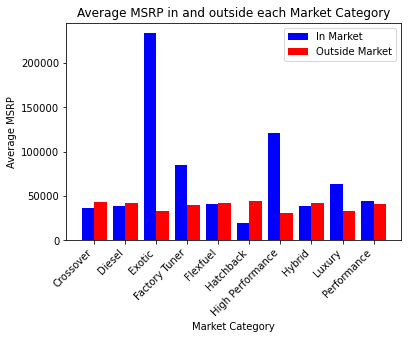

In [44]:
Market_Cat = [mean_crossover,mean_diesel,mean_exotic,mean_factuner,mean_flexfuel,mean_hatchback,mean_highperf,
              mean_hybrid,mean_luxury,mean_performance]
non_Market_Cat = [mean_noncrossover,mean_nondiesel,mean_nonexotic,mean_nonfactuner,mean_nonflexfuel,mean_nonhatchback,
                  mean_nonhighperf,mean_nonhybrid,mean_nonluxury,mean_nonperformance]
X = ['Crossover','Diesel','Exotic','Factory Tuner','Flexfuel','Hatchback','High Performance',
    'Hybrid','Luxury','Performance']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Market_Cat, width=0.4, color='b', align='center', label='In Market')
plt.bar(X_axis + 0.2, non_Market_Cat, width=0.4, color='r', align='center', label='Outside Market')
plt.xticks(X_axis, X)
plt.xticks(
    rotation=45, 
    horizontalalignment='right'  
)
plt.xlabel("Market Category")
plt.ylabel("Average MSRP")
plt.title("Average MSRP in and outside each Market Category")
plt.legend()

Looking at all the market categories above. It seems like the following types engourage a higher price: Exotic, High-performance, luxury. They all make sense.

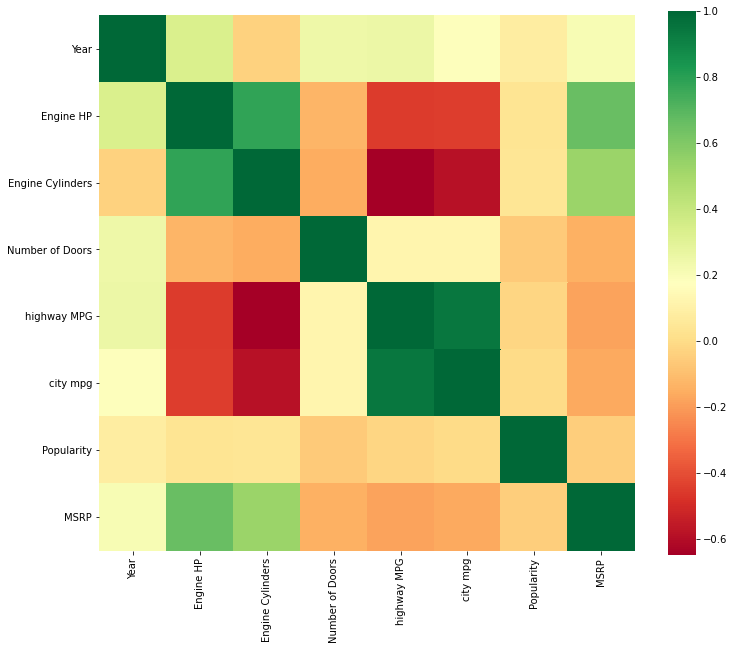

In [45]:
#Let's use heatmap to gain a high level view of relationships amongst the features.
#Catigorized features were removed for clarity
plt.subplots(figsize=(12,10))
list_to_drop = ['Crossover','Diesel','Exotic','Factory Tuner','Flex Fuel','Hatchback','High-Performance','Hybrid','Luxury','Performance']
sns.heatmap(car_data.drop(list_to_drop, axis='columns').corr(), square=True, cmap='RdYlGn');

It looks like Engine HP has the highest correlation with MSRP, then is the Engine Cylinders. The positvie correlation means that the higher the Engine HP and the higher the MSRP. It makes sense. People would like to pay more for car with higher performance. The MSRP is also highly correlated with Engine Cylinders. However, the Engine Cylinders has a strong relationship with Engine HP. So maybe only one of them is required for the model. Highway MPG and city MPG has a negative correlation with MSRP. The relationship is not very strong. It will worth to take a look at the scatter plot. The Engine Cylinders has strong negative correlation with highway MPG. More number of engine cylinders tends to have lower highway MPG. Same apply to city mpg since highway MPG is highly correlated with city MPG.

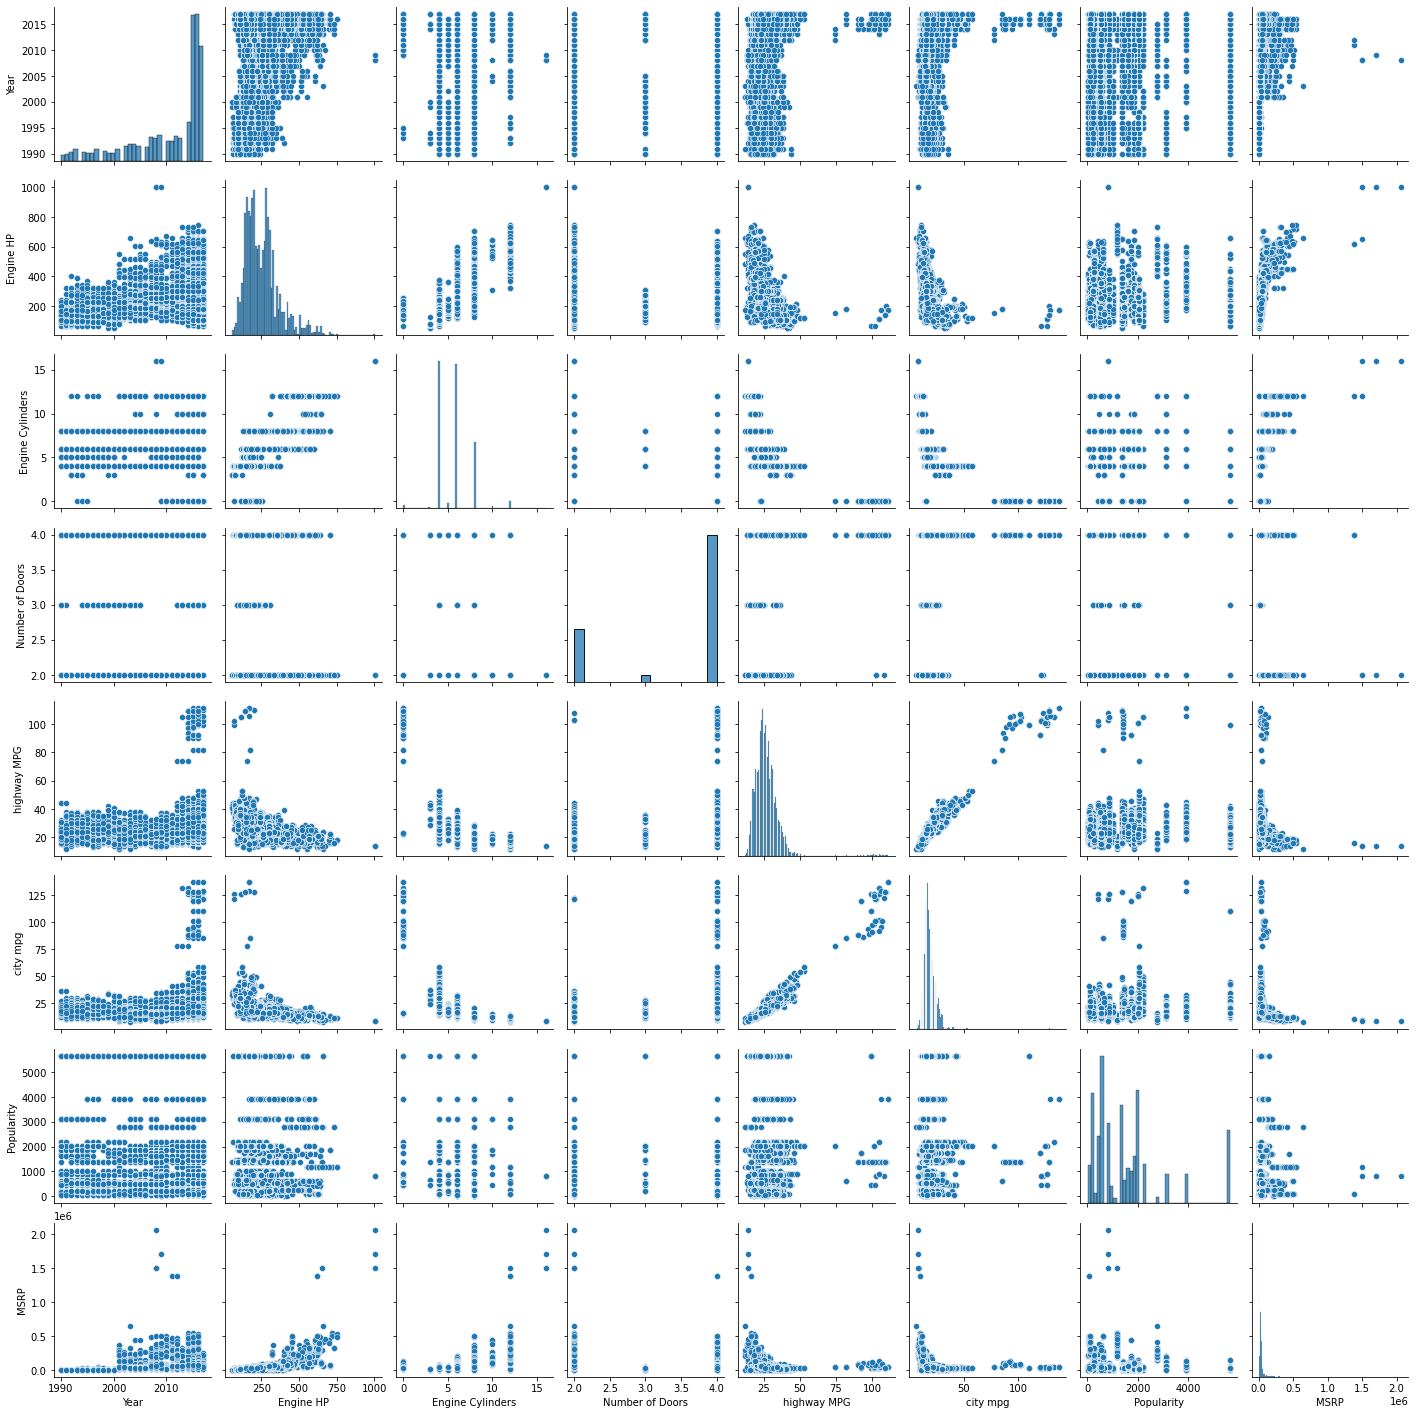

In [46]:
sns.pairplot(car_data.drop(list_to_drop, axis='columns'))

Text(0.5, 1.0, 'Engine HP vs. MSRP')

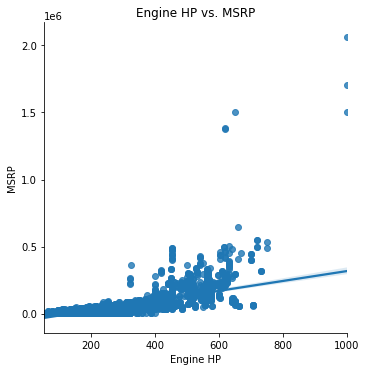

In [47]:
sns.lmplot(x='Engine HP', y='MSRP',data=car_data)
plt.title('Engine HP vs. MSRP')

Text(0.5, 1.0, 'Engine HP vs. MSRP')

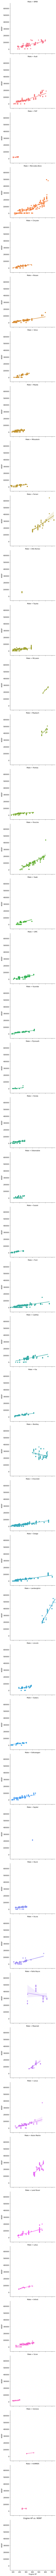

In [48]:
sns.lmplot(x='Engine HP', y='MSRP',data=car_data[car_data['MSRP']<1000000],hue='Make', row='Make')
plt.title('Engine HP vs. MSRP')

Text(0.5, 1.0, 'City MPG vs. Highway MPG')

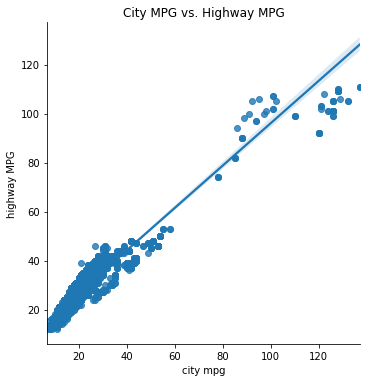

In [49]:
sns.lmplot(x='city mpg', y='highway MPG',data=car_data)
plt.title('City MPG vs. Highway MPG')

Text(0.5, 1.0, 'Engine HP vs. Highway MPG')

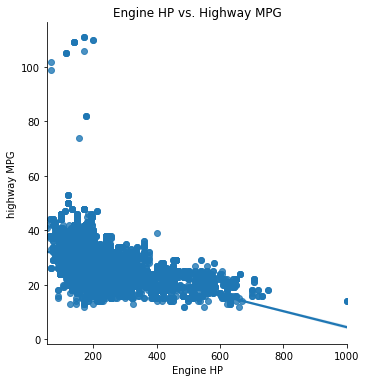

In [50]:
sns.lmplot(x='Engine HP', y='highway MPG',data=car_data)
plt.title('Engine HP vs. Highway MPG')